<a href="https://colab.research.google.com/github/Abhinavl3v3l/EVA3/blob/master/Assignment_6_model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


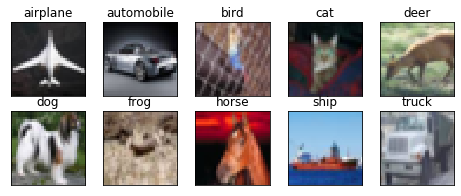

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

Assignment 6
1. Run this network.  (Links to an external site.) After training the network, whatever accuracy you get is your base accuracy. Epochs = 100
2. Fix the network above:
- remove dense
- add layers required to reach RF
- fix kernel scaleup and down (1x1)
- see if all dropouts are properly placed
- follow the guidelines we discussed in the class (
- Get accuracy more than the base accuracy in less number 100 epochs. Hint, you might want to use "border_mode='same',"
- Save File as Assignment 6A
3. Rewrite it again using these convolutions in the order given below:
- Normal Convolution
- Spatially Separable Convolution  (Conv2d(x, (3,1)) followed by Conv2D(x,(3,1))
- Depthwise Separable Convolution
- Grouped Convolution (use 3x3, 5x5 only)
- Grouped Convolution (use 3x3 only, one with dilation = 1, and another with dilation = 2) 
- You must use all of the 5 above at least once
- Train this new model for 50 epochs. 
- Save File as Assignment 6B
>Total Score of 600. 400 for Code (300+100), and 200 for documentation (100+100)
Upload the github folder link which has both the files. 

In [7]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3)))# 32
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Convolution2D(64, 3, 3))#  30
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3,, border_mode='same'))#  30
model.add(Activation('relu'))


model.add(MaxPooling2D(pool_size=(2, 2))) #15

model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same')) #15
model.add(BatchNormalization())
model.add(Activation('relu')) 
model.add(Convolution2D(128, 3, 3))  # 13
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Convolution2D(128, 3, 3,border_mode='same'))  # 13
model.add(MaxPooling2D(pool_size=(2, 2))) #6

model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same')) #6
model.add(Activation('relu'))
model.add(Convolution2D(256, 3, 3)) # 4
model.add(Activation('relu'))
model.add(Convolution2D(512, 3, 3)) # 2
# model.add(MaxPooling2D(pool_size=(2, 2))) #2 

model.add(Dropout(0.25))


model.add(Convolution2D(10, 2))
model.add(Flatten())
model.add(Activation('softmax'))


from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.007 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.007), metrics=['accuracy'])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3))`


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 48)        192       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 48)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  del sys.path[0]




Epoch 1/50
390/390 [==============================] - 34s 87ms/step - loss: 1.6387 - acc: 0.4612 - val_loss: 2.1994 - val_acc: 0.4110
Epoch 2/50
390/390 [==============================] - 28s 73ms/step - loss: 1.2109 - acc: 0.5959 - val_loss: 1.1141 - val_acc: 0.6139
Epoch 3/50
390/390 [==============================] - 28s 73ms/step - loss: 1.0021 - acc: 0.6569 - val_loss: 1.2570 - val_acc: 0.5723
Epoch 4/50
390/390 [==============================] - 28s 73ms/step - loss: 0.8793 - acc: 0.6935 - val_loss: 0.8791 - val_acc: 0.6976
Epoch 5/50
390/390 [==============================] - 28s 73ms/step - loss: 0.7716 - acc: 0.7281 - val_loss: 1.2168 - val_acc: 0.6099
Epoch 6/50
390/390 [==============================] - 28s 73ms/step - loss: 0.7015 - acc: 0.7561 - val_loss: 0.9393 - val_acc: 0.6991
Epoch 7/50
390/390 [==============================] - 28s 72ms/step - loss: 0.6473 - acc: 0.7729 - val_loss: 0.7533 - val_acc: 0.7407
Epoch 8/50
390/390 [==============================] - 28s 73

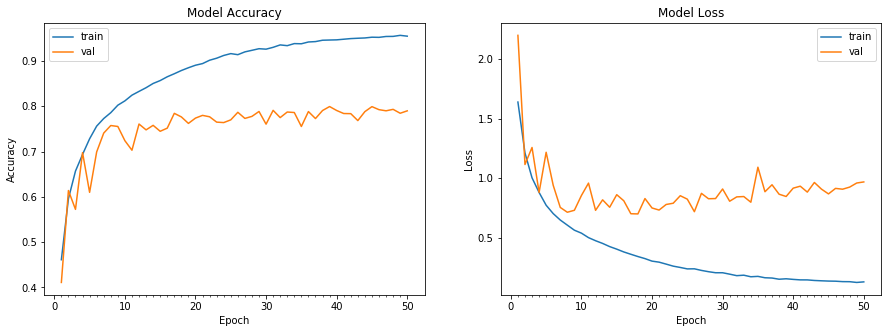

Accuracy on test data is: 78.98


In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)



# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))